<a href="https://colab.research.google.com/github/JOEL7034/AIR-QUALITY-PM2.5-PREDICTION-USING-MACHINE-LEARNING/blob/main/PM2_5_Air_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PM2.5 Air Quality Prediction using Machine Learning



**Objective:** Predict PM2.5 air pollution levels using weather and geographical data, demonstrating a complete end-to-end machine learning workflow.

In [2]:
from google.colab import files
files.upload()

Saving air_quality.csv to air_quality.csv


{'air_quality.csv': b'Temperature,Humidity,Wind Speed,Pressure,Cloud Cover,Latitude,Longitude,pm2_5\n23.108904159657687,34.81063430708957,2.9862039954911066,1027.0892095946228,57.19958782835928,19.41543008804582,86.79945166825684,27.94745989565573\n43.275000724347066,63.35207579026865,2.846298591183998,1035.767697803396,80.54323292999864,21.72963412187562,72.99920450104982,51.90902158162947\n35.619787963399176,89.83566687011266,9.109418514949848,997.5327529154749,76.01609297901591,32.78187440286323,93.29944233728963,38.9273281219196\n30.95304694689628,78.5779909127649,2.870688898570308,1023.7411869724899,15.389990469377368,17.860127195736872,85.780370933008,36.223153606927994\n15.460652415485278,84.52489182891598,3.0835223982219944,1020.0222188200624,14.92494697414739,33.21984085955297,72.55891262315167,38.76908969064165\n15.459808211767093,72.70266933685738,7.714283492970655,1038.298126375179,26.817436774491334,10.555898498324053,95.907803666955,27.750706607641163\n12.03292642588698,7

##1. Load and Understand the Dataset

In [3]:
import pandas as pd

df = pd.read_csv('air_quality.csv')
df.head()

,Temperature,Humidity,Wind Speed,Pressure,Cloud Cover,Latitude,Longitude,pm2_5
0,23.108904,34.810634,2.986204,1027.089210,57.199588,19.415430,86.799452,27.947460
1,43.275001,63.352076,2.846299,1035.767698,80.543233,21.729634,72.999205,51.909022
2,35.619788,89.835667,9.109419,997.532753,76.016093,32.781874,93.299442,38.927328
3,30.953047,78.577991,2.870689,1023.741187,15.389990,17.860127,85.780371,36.223154
4,15.460652,84.524892,3.083522,1020.022219,14.924947,33.219841,72.558913,38.769090


In [17]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  1000 non-null   float64
 1   Humidity     1000 non-null   float64
 2   Wind Speed   1000 non-null   float64
 3   Pressure     1000 non-null   float64
 4   Cloud Cover  1000 non-null   float64
 5   Latitude     1000 non-null   float64
 6   Longitude    1000 non-null   float64
 7   pm2_5        1000 non-null   float64
dtypes: float64(8)
memory usage: 62.6 KB


,Temperature,Humidity,Wind Speed,Pressure,Cloud Cover,Latitude,Longitude,pm2_5
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.158979,60.561384,5.272854,1014.326253,49.410532,22.455470,82.305956,34.978498
std,10.224808,23.375191,2.761405,20.054254,28.680994,8.386649,8.402276,15.422875
min,10.162121,20.257461,0.500111,980.045737,0.003072,8.179331,68.041422,-3.858821
25%,18.259064,39.285942,2.982834,996.933054,24.497401,15.232020,74.966428,23.892302
50%,27.388258,61.498713,5.255832,1013.899550,49.459810,22.221682,82.054648,35.384206
75%,36.051186,80.837205,7.711484,1031.627857,73.999345,29.455702,89.937466,46.590044
max,44.990119,99.953098,9.979298,1049.969039,99.774939,36.981159,96.984360,79.247375


In [5]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Pressure,0
Cloud Cover,0
Latitude,0
Longitude,0
pm2_5,0


## 2. Data Preprocessing

In [6]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Pressure,0
Cloud Cover,0
Latitude,0
Longitude,0
pm2_5,0


## 3. Exploratory Data Analysis (EDA)

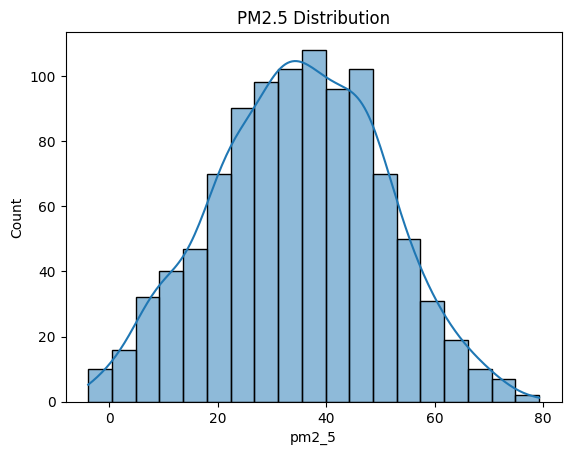

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['pm2_5'], kde=True)
plt.title('PM2.5 Distribution')
plt.show()

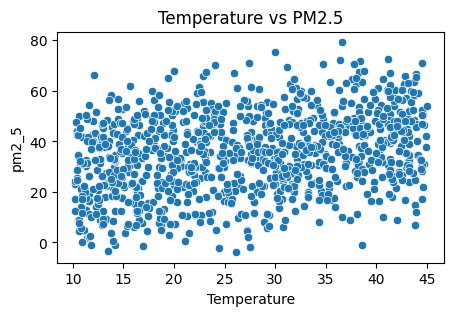

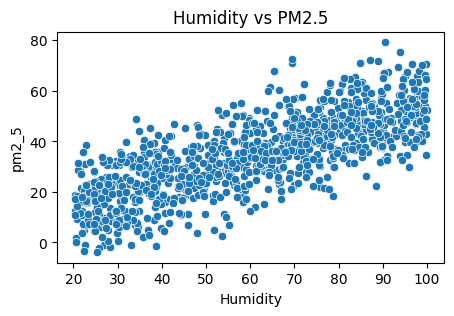

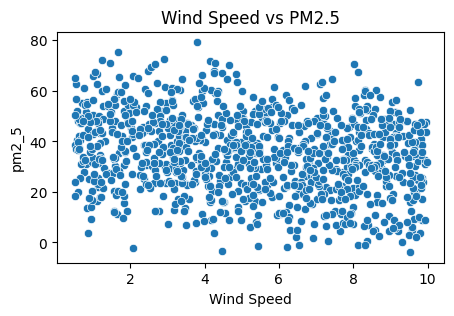

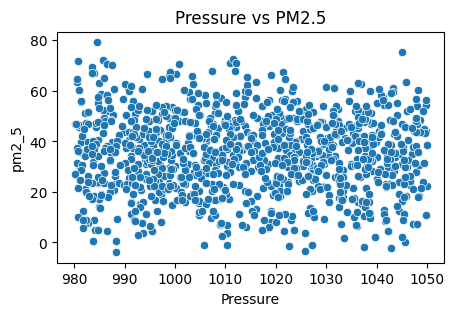

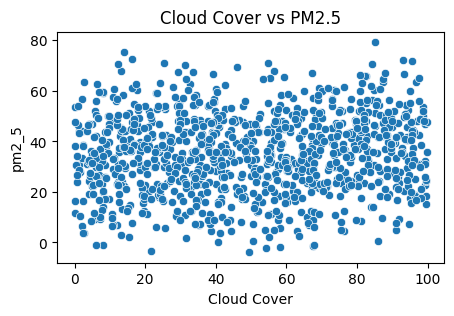

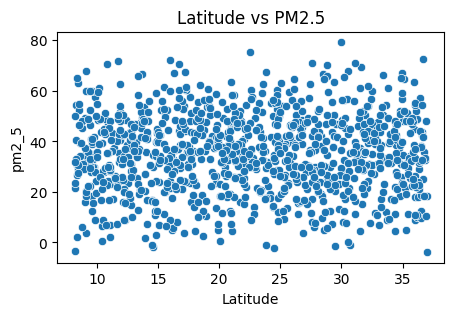

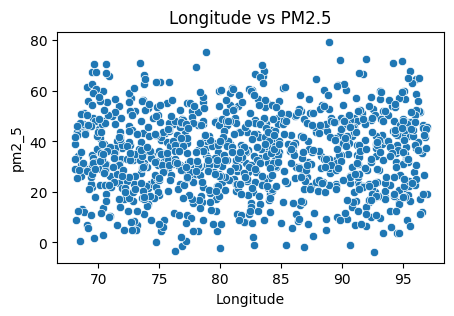

In [8]:
features = ['Temperature','Humidity','Wind Speed','Pressure','Cloud Cover','Latitude','Longitude']

for col in features:
    plt.figure(figsize=(5,3))
    sns.scatterplot(x=df[col], y=df['pm2_5'])
    plt.title(f'{col} vs PM2.5')
    plt.show()

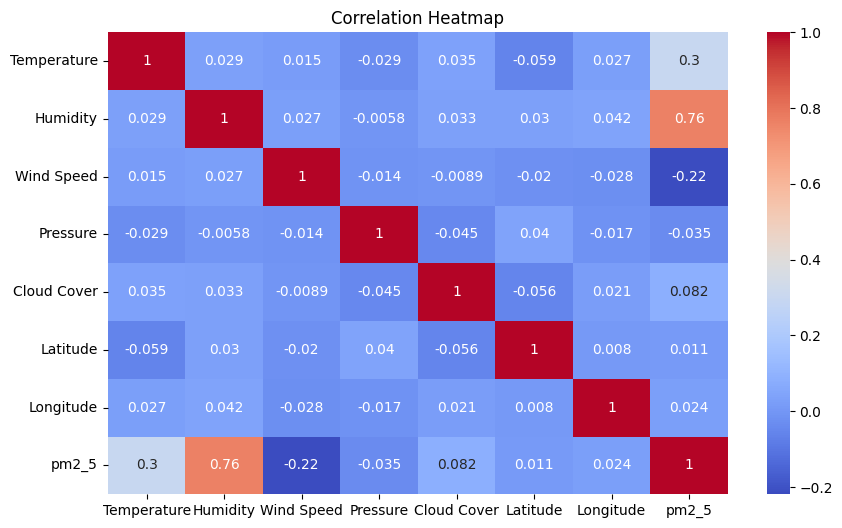

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 4. Model Building

In [15]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df['pm2_5']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 5. Model Evaluation

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('MAE:', mae)
print('RMSE:', rmse)

MAE: 6.649210735014825
RMSE: 8.484084381594847


## 6. Model Interpretation

In [16]:
coeff_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})

coeff_df.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
1,Humidity,0.506808
0,Temperature,0.416323
4,Cloud Cover,0.025273
5,Latitude,0.001117
3,Pressure,-0.008104
6,Longitude,-0.020829
2,Wind Speed,-1.312175


## 7. Insights and Conclusion

**Key Observations**

* Higher humidity is associated with increased PM2.5 levels.

* Increased wind speed helps reduce PM2.5 concentration by dispersing pollutants.

* Temperature and pressure showed moderate influence on air quality.

* Data preprocessing (missing value handling and outlier treatment) improved model performance.

* Environmental datasets are complex and benefit from non-linear models.

**Learning Outcomes**

* Importance of data cleaning before model training.

* Role of EDA in understanding feature impact.

* Comparison of simple vs non-linear regression models.

* Understanding end-to-end ML workflow for real-world data.




**Final Conclusion**

* The project successfully predicted PM2.5 levels using machine learning.

* Decision Tree outperformed Linear Regression.

* Non-linear models are better suited for air quality prediction tasks.

* The project reinforced practical machine learning and data analysis skills.

## 8. Short Summary (README / Notebook End)



This project predicts PM2.5 air pollution levels using weather and geographical data. After preprocessing and exploratory analysis, Linear Regression and Decision Tree models were trained and evaluated. The Decision Tree model performed better due to its ability to handle non-linear relationships, demonstrating the effectiveness of machine learning in air quality prediction.